In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [2]:
cryo_data = np.loadtxt("4K-Transmission-Data/4Kdata.csv", delimiter=",")
rt_data = np.loadtxt("RT-Transmission-Data/RTdata.csv", delimiter=",")
# m is 88

In [3]:
x = cryo_data[:,0] 
del_lam = cryo_data[:,1]

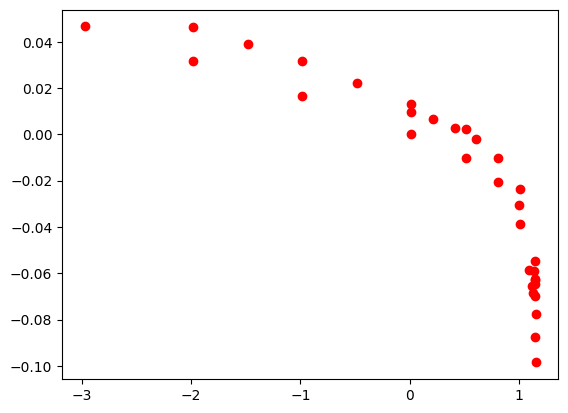

In [4]:
plt.plot(x, del_lam, 'ro', label='data')
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [5]:
del_lam_smooth=np.zeros(np.shape(del_lam))
for i in range(len(del_lam)):
    if i==0:
        del_lam_smooth[i]=(del_lam[i]+del_lam[i]+del_lam[i+1])/3
    elif i==len(del_lam)-1:
        del_lam_smooth[i]=(del_lam[i-1]+del_lam[i]+del_lam[i])/3
    else:
        del_lam_smooth[i]=(del_lam[i-1]+del_lam[i]+del_lam[i+1])/3

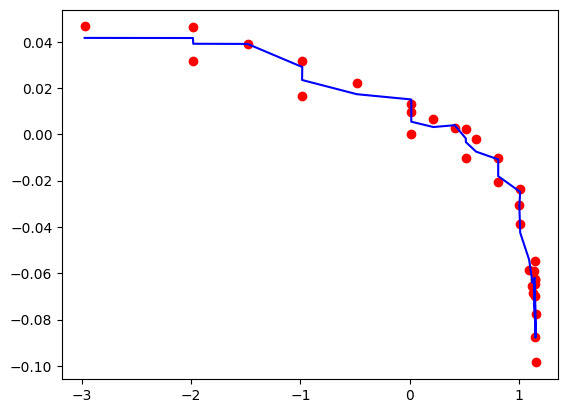

In [6]:
plt.plot(x, del_lam, 'ro', label='data')
plt.plot(x, del_lam_smooth, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

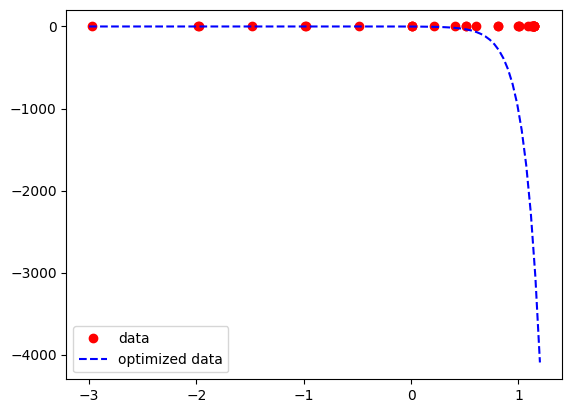

In [7]:
#smoothing doesn't seem to work very well so I'll just do a fit

def Guess(x,a,b,c):
    return -a**(x*b)+c

#plot a guess to make sure the guess values work
new_x = np.linspace(-3, 1.2, 100)
ans = Guess(new_x,2,10,0.05)

plt.plot(x, del_lam, 'ro', label='data')
plt.plot(new_x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [8]:
fit_params_arr=np.zeros([len(del_lam)+1,3])
fit_params_arr[0]=[3,3,0.05]
for i in range(len(del_lam)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x,del_lam,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98906975]
 [2.65475615 0.03418185 0.98

C:\Users\madel\AppData\Local\Temp\ipykernel_16360\2939072838.py:4: RuntimeWarning: invalid value encountered in power
  return -a**(x*b)+c
C:\Users\madel\AppData\Local\Temp\ipykernel_16360\2939072838.py:4: RuntimeWarning: overflow encountered in power
  return -a**(x*b)+c


In [9]:
fit_ans = Guess(x,fit_params_arr[:,0], fit_params_arr[:,1], fit_params_arr[:,2])

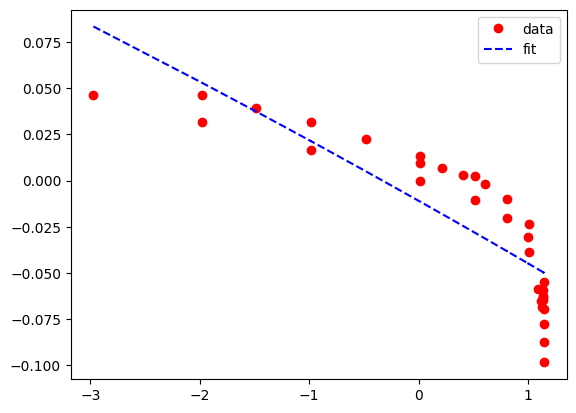

In [10]:
plt.plot(x, del_lam, 'ro', label='data')
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
plt.legend()
plt.savefig("fitdata.png")
plt.show()


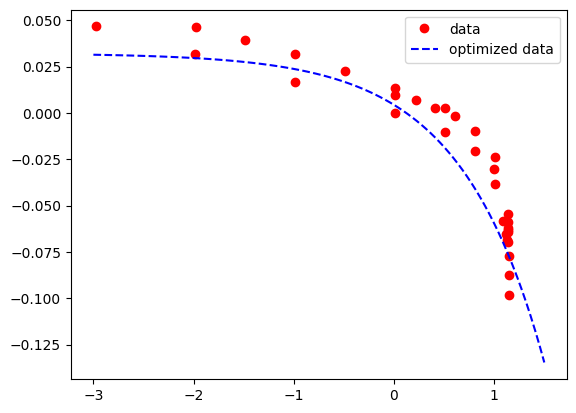

In [11]:
#decent first guess, but let's get rid of c now and try again.

def Guess(x,a,b):
    return -a**(x-b)+0.03212456

#plot a guess to make sure the guess values work
new_x = np.linspace(-3, 1.5, 100)
ans = Guess(new_x,3.3,3)

plt.plot(x, del_lam, 'ro', label='data')
plt.plot(new_x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [12]:
fit_params_arr=np.zeros([len(del_lam)+1,2])
fit_params_arr[0]=[3,3]
for i in range(len(del_lam)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x,del_lam,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[5.95218029 2.43527552]
 [5.95232284 2.43525734]
 [5.9523518  2.43525365]
 [5.9523578  2.43525288]
 [5.95235898 2.43525273]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]
 [5.95235922 2.4352527 ]]


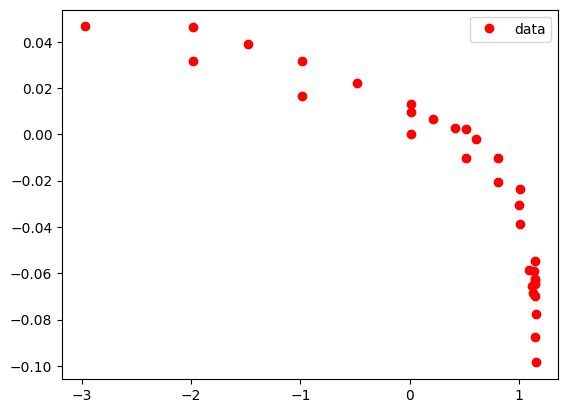

In [13]:
fit_ans = Guess(x,fit_params_arr[:,0], fit_params_arr[:,1])

plt.plot(x, del_lam, 'ro', label='data')
#plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [14]:
print(del_lam)

[ 4.65952096e-02  3.17833498e-02  4.64546716e-02  3.91554425e-02
  3.15570747e-02  1.65077812e-02  2.23593109e-02  1.31797726e-02
  9.69084807e-03 -3.84474499e-05  6.75130773e-03  2.76038965e-03
  2.37154635e-03 -1.04125465e-02 -1.96877668e-03 -1.00292941e-02
 -2.04395996e-02 -2.36814755e-02 -3.03818708e-02 -3.85392909e-02
 -5.84736826e-02 -6.53385521e-02 -6.86476358e-02 -5.48263743e-02
 -6.23608111e-02 -7.74847636e-02 -8.74874109e-02 -9.85254736e-02
 -5.90589685e-02 -6.45127029e-02 -6.96030708e-02 -6.30044843e-02]


In [15]:
new_y = del_lam + 1
new_x = x + 3
print(new_y)

[1.04659521 1.03178335 1.04645467 1.03915544 1.03155707 1.01650778
 1.02235931 1.01317977 1.00969085 0.99996155 1.00675131 1.00276039
 1.00237155 0.98958745 0.99803122 0.98997071 0.9795604  0.97631852
 0.96961813 0.96146071 0.94152632 0.93466145 0.93135236 0.94517363
 0.93763919 0.92251524 0.91251259 0.90147453 0.94094103 0.9354873
 0.93039693 0.93699552]


In [16]:
log_y = np.log(new_y)
print(log_y)

[ 4.55422379e-02  3.12887126e-02  4.54079477e-02  3.84083088e-02
  3.10693837e-02  1.63730089e-02  2.21130062e-02  1.30936751e-02
  9.64419298e-03 -3.84481890e-05  6.72861971e-03  2.75658677e-03
  2.36873867e-03 -1.04671364e-02 -1.97071727e-03 -1.00799263e-02
 -2.06513790e-02 -2.39663887e-02 -3.08529663e-02 -3.93015789e-02
 -6.02529786e-02 -6.75709031e-02 -7.11175940e-02 -5.63866375e-02
 -6.43900640e-02 -8.06513868e-02 -9.15533974e-02 -1.03723494e-01
 -6.08748072e-02 -6.66877120e-02 -7.21439783e-02 -6.50767826e-02]


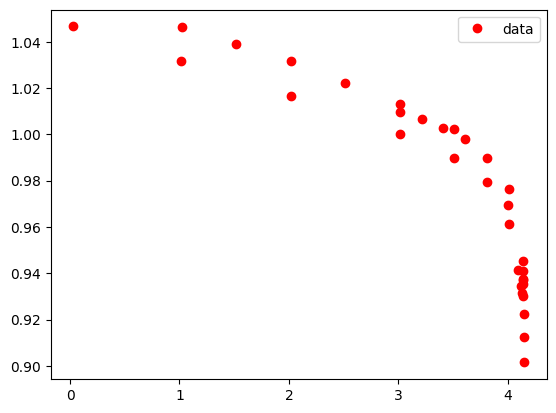

In [17]:
plt.plot(new_x, new_y, 'ro', label='data')
plt.legend()
plt.savefig("fitdata.png")
plt.show()

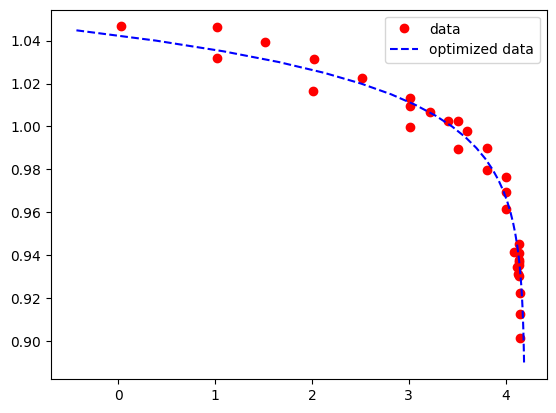

In [18]:
#here try solving for x instead

def GF(y,a,b,c,d):
    return -b**(a*y-d)+c

#plot a guess to make sure the guess values work
fit_y = np.linspace(0.89, 1.045, 32)
ans = GF(fit_y,100,1.5,4.2,100.7)

plt.plot(new_x, new_y, 'ro', label='data')
plt.plot(ans, fit_y, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [19]:
fit_params_arr=np.zeros([len(new_x)+1,4])
fit_params_arr[0]=[100,1.5,4.2,100.7]
for i in range(len(new_x)):
    fit_params_arr[i],fit_cov_arr=curve_fit(GF,new_y,new_x,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[77.47960283  1.46045939  4.30324717 77.53041557]
 [77.40174536  1.4610329   4.30322586 77.4525959 ]
 [77.32401267  1.4615883   4.30322823 77.37480191]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30322801 77.29709234]
 [77.24635315  1.46214623  4.30

C:\Users\madel\AppData\Local\Temp\ipykernel_16360\3551994216.py:4: RuntimeWarning: overflow encountered in power
  return -b**(a*y-d)+c


In [20]:
print(fit_y)

[0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925 0.93  0.935 0.94  0.945
 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985 0.99  0.995 1.    1.005
 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045]


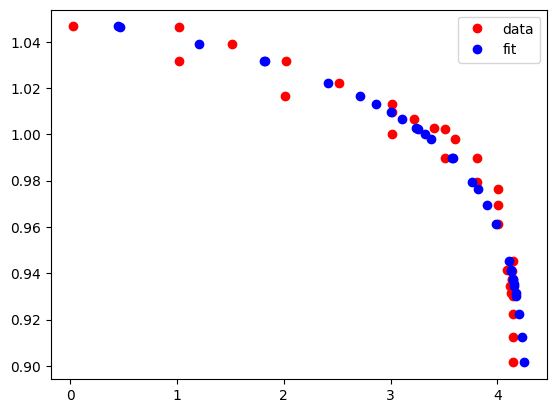

In [21]:
fit_ans = GF(new_y,fit_params_arr[:,0], fit_params_arr[:,1],fit_params_arr[:,2],fit_params_arr[:,3])

plt.plot(new_x, new_y, 'ro', label='data')
plt.plot(fit_ans, new_y,'o', color ='blue', label ="fit")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

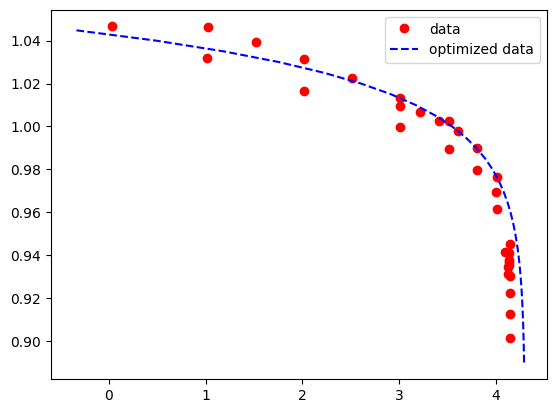

In [22]:
#now we just try to adjust the fit

def GF(y,a,b,d):
    return -b**(a*y-d)+4.3

#plot a guess to make sure the guess values work
fit_y = np.linspace(0.89, 1.045, 32)
ans = GF(fit_y,100,1.5,100.7)

plt.plot(new_x, new_y, 'ro', label='data')
plt.plot(ans, fit_y, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [23]:
fit_params_arr=np.zeros([len(new_x)+1,3])
fit_params_arr[0]=[100,1.5,100.7]
for i in range(len(new_x)):
    fit_params_arr[i],fit_cov_arr=curve_fit(GF,new_y,new_x,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[84.66573496  1.41546784 84.73234666]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852 84.81728213]
 [84.75059712  1.41497852

C:\Users\madel\AppData\Local\Temp\ipykernel_16360\1070242466.py:4: RuntimeWarning: overflow encountered in power
  return -b**(a*y-d)+4.3
C:\Users\madel\AppData\Local\Temp\ipykernel_16360\1070242466.py:4: RuntimeWarning: invalid value encountered in power
  return -b**(a*y-d)+4.3


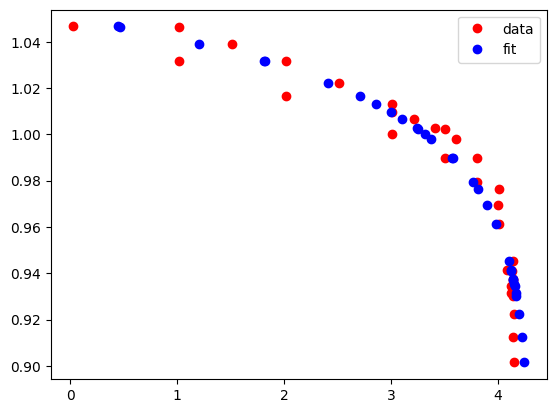

In [24]:
fit_ans = GF(new_y,fit_params_arr[:,0], fit_params_arr[:,1],fit_params_arr[:,2])

plt.plot(new_x, new_y, 'ro', label='data')
plt.plot(fit_ans, new_y,'o', color ='blue', label ="fit")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

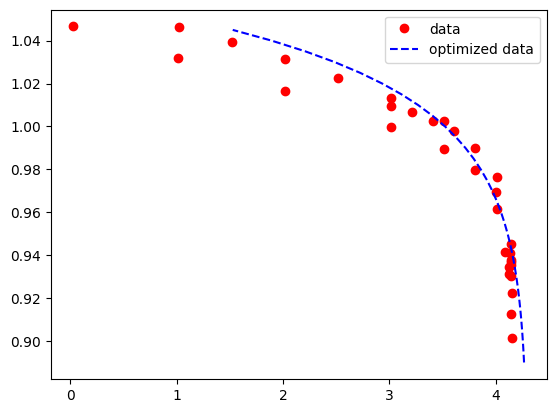

In [25]:
#now we just try to adjust the fit

def GF(y,a,b):
    return -b**(a*y-84.75)+4.3

#plot a guess to make sure the guess values work
fit_y = np.linspace(0.89, 1.045, 32)
ans = GF(fit_y,84,1.4)

plt.plot(new_x, new_y, 'ro', label='data')
plt.plot(ans, fit_y, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [26]:
fit_params_arr=np.zeros([len(new_x)+1,2])
fit_params_arr[0]=[84,1.4]
for i in range(len(new_x)):
    fit_params_arr[i],fit_cov_arr=curve_fit(GF,new_y,new_x,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[84.6833682   1.41536903]
 [84.68336863  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]
 [84.68336861  1.41536895]]


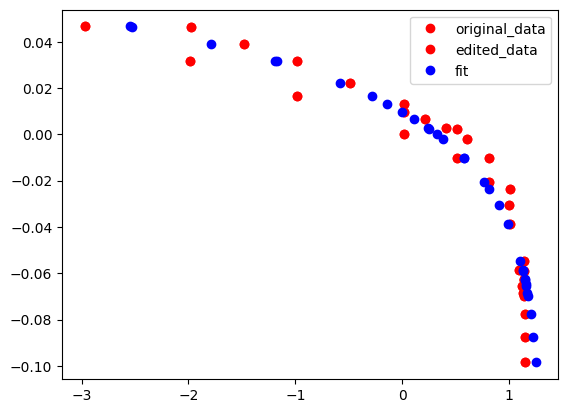

In [27]:
fit_ans = GF(new_y,fit_params_arr[:,0], fit_params_arr[:,1])

new_x -= 3
new_y -= 1
fit_ans -= 3

plt.plot(x, del_lam, 'ro', label='original_data')
plt.plot(new_x, new_y, 'ro', label='edited_data')
plt.plot(fit_ans, new_y,'o', color ='blue', label ="fit")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

#we see the initial data matches completely with the edited, so we can use the fit data now for the NEFF caluclations

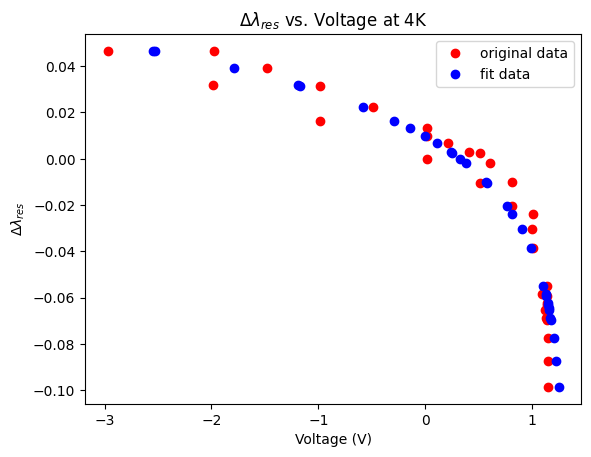

In [28]:
plt.plot(x, del_lam, 'ro', label='original data')
plt.plot(fit_ans, new_y,'o', color ='blue', label ="fit data")
plt.title("$\Delta\lambda_{res} $ vs. Voltage at 4K")
plt.xlabel("Voltage (V)")
plt.ylabel("$\Delta \lambda_{res}$")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [29]:
# equation for m values
m = 2.1731*10000*2*math.pi*1/1547.4
print(m)
m = 2.1731*10000*2*math.pi*1/1550
print(m)

88.23827058958224
88.09025800665779


In [30]:
R = 10000 #in nm

del_n_eff = new_y*88/(2*np.pi*R)

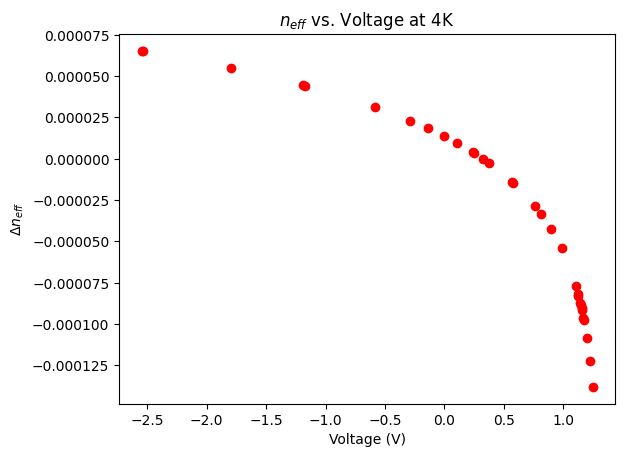

In [31]:
plt.plot(fit_ans, del_n_eff, 'ro', label='data')
#plt.plot(fit_ans, del_n_eff, 'b-', label='data')
plt.title("$n_{eff}$ vs. Voltage at 4K")
plt.xlabel("Voltage (V)")
plt.ylabel("$\Delta n_{eff}$")
#plt.plot(x, ydata, 'b-', label='data')
plt.savefig("4KDelNeff.png")
plt.show()

#data to be used in the Verilog-A code

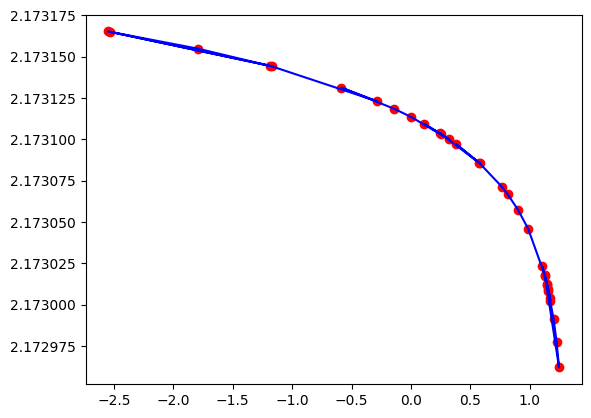

In [32]:
n_eff = 2.1731 + del_n_eff

plt.plot(fit_ans, n_eff, 'ro', label='data')
plt.plot(fit_ans, n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

#not actually needed in Verilog-A because we just need change in n_eff, not n_eff itself

In [33]:
#not sure if this is the correct order

np.savetxt("FinalCSVs/smoothcryoDneff.csv", np.c_[fit_ans, del_n_eff], delimiter = ",")

    

In [34]:
test = np.loadtxt("FinalCSVs/Rearrange-SmoothCryo.csv", delimiter=",")

x = test[:,0] 
y = test[:,1]


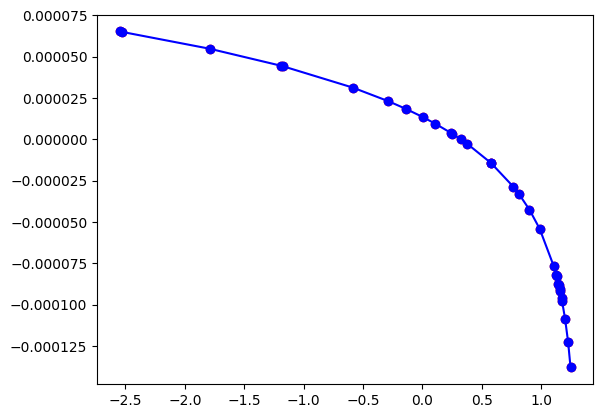

In [53]:
plt.plot(x,y, 'ro', label='data')
plt.plot(fit_ans, del_n_eff, 'bo', label='data')
plt.plot(x,y, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [ ]:
#this means the rearranged one is correct so we use that one

In [36]:
#doing the same for RT data, but I know how to do it now so the process is simplified.

rtx = rt_data[:,0] 
rtdel_lam = rt_data[:,1]

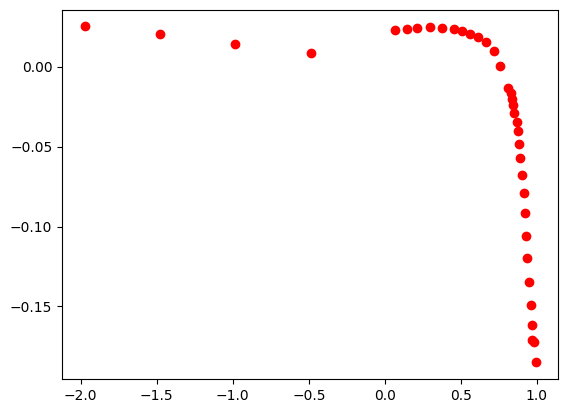

In [37]:
plt.plot(rtx, rtdel_lam, 'ro', label='rtdata')
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [38]:
rtnew_y = rtdel_lam + 1
rtnew_x = rtx + 3
print(rtnew_y)

[1.0250754  1.02046618 1.01413079 1.00852482 1.02284208 1.0235001
 1.02412066 1.02469509 1.02432635 1.02346134 1.02217076 1.02062296
 1.01838724 1.00949228 1.01523019 1.00022996 0.98679924 0.98353747
 0.98001452 0.9760082  0.97112685 0.96540165 0.95960744 0.95139829
 0.94271785 0.9323427  0.92094671 0.90824302 0.89410526 0.88005219
 0.86554528 0.85098593 0.83859079 0.82930058 0.81498772 0.82788331]


In [39]:
rtlog_y = np.log(rtnew_y)
print(rtlog_y)

[ 0.02476617  0.02025956  0.01403188  0.00848869  0.02258511  0.02322823
  0.02383435  0.0243951   0.02403518  0.02319035  0.02192856  0.02041318
  0.01822024  0.00944751  0.01511538  0.00022993 -0.01328866 -0.01659954
 -0.0201879  -0.02428429 -0.02929818 -0.03521105 -0.041231   -0.04982249
 -0.05898825 -0.07005483 -0.08235311 -0.09624329 -0.11193177 -0.12777407
 -0.14439559 -0.16135968 -0.17603243 -0.18717261 -0.20458224 -0.18888306]


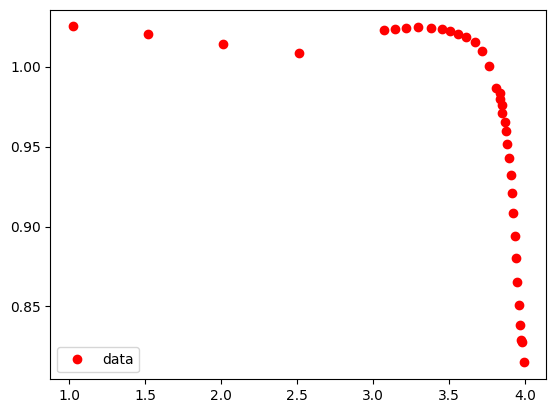

In [40]:
plt.plot(rtnew_x, rtnew_y, 'ro', label='data')
plt.legend()
plt.show()

In [41]:
print(len(rtnew_y))

36


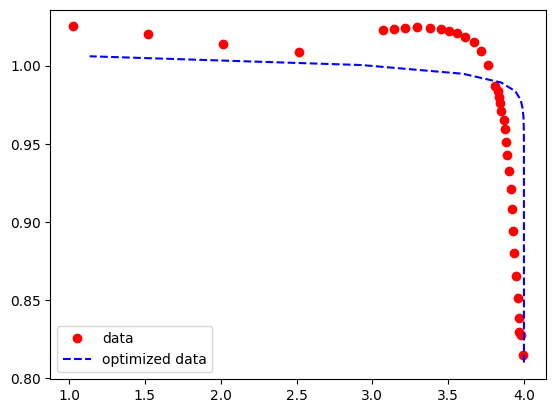

In [42]:
def GF(y,a,b,c,d):
    return -b**(a*y-d)+c

#plot a guess to make sure the guess values work
rtfit_y = np.linspace(0.81, 1.006, 36)
rtans = GF(rtfit_y,26,850,4.0,26)

plt.plot(rtnew_x, rtnew_y, 'ro', label='data')
plt.plot(rtans, rtfit_y, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()

In [43]:
fit_params_arr=np.zeros([len(rtnew_x)+1,4])
fit_params_arr[0]=[26,850,4.0,26]
for i in range(len(rtnew_x)):
    fit_params_arr[i],fit_cov_arr=curve_fit(GF,rtnew_y,rtnew_x,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[3.31127027e+00 4.75550214e+04 3.97382260e+00 3.38221442e+00]
 [3.31460440e+00 4.71402828e+04 3.97379619e+00 3.38562218e+00]
 [3.31794316e+00 4.66147700e+04 3.97380185e+00 3.38903202e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.38561856e+00]
 [3.31460122e+00 4.71260925e+04 3.97380077e+00 3.385618

C:\Users\madel\AppData\Local\Temp\ipykernel_16360\1542463094.py:2: RuntimeWarning: overflow encountered in power
  return -b**(a*y-d)+c
C:\Users\madel\AppData\Local\Temp\ipykernel_16360\1542463094.py:2: RuntimeWarning: invalid value encountered in power
  return -b**(a*y-d)+c


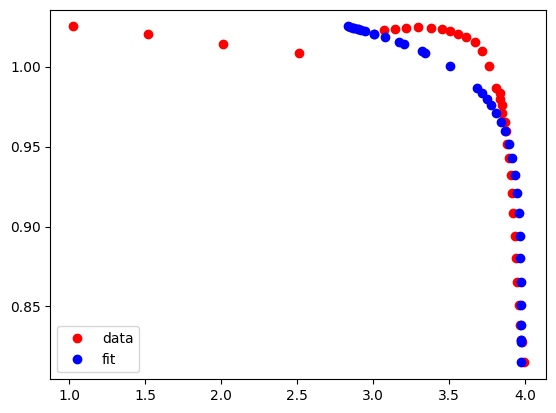

In [44]:
rtfit_ans = GF(rtnew_y,fit_params_arr[:,0], fit_params_arr[:,1],fit_params_arr[:,2],fit_params_arr[:,3])

plt.plot(rtnew_x, rtnew_y, 'ro', label='data')
plt.plot(rtfit_ans, rtnew_y,'o', color ='blue', label ="fit")
plt.legend()

plt.show()

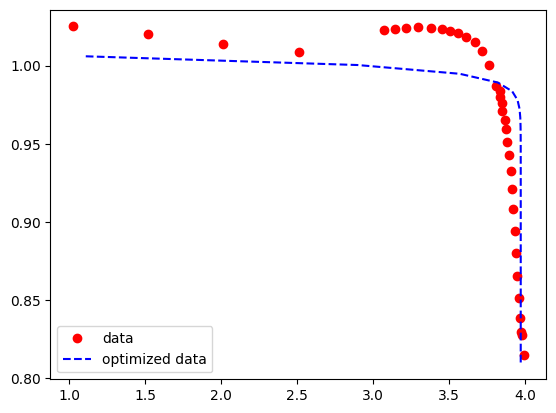

In [45]:
def GF(y,a,b,d):
    return -b**(a*y-d)+3.97

#plot a guess to make sure the guess values work
rtfit_y = np.linspace(0.81, 1.006, 36)
rtans = GF(rtfit_y,26,850,26)

plt.plot(rtnew_x, rtnew_y, 'ro', label='data')
plt.plot(rtans, rtfit_y, '--', color ='blue', label ="optimized data")
plt.legend()

plt.show()

In [46]:
fit_params_arr=np.zeros([len(rtnew_x)+1,3])
fit_params_arr[0]=[26,850,26]
for i in range(len(rtnew_x)):
    fit_params_arr[i],fit_cov_arr=curve_fit(GF,rtnew_y,rtnew_x,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[2.66362117e+00 7.33393021e+05 2.72097844e+00]
 [2.66095732e+00 7.42497829e+05 2.71825777e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.72097597e+00]
 [2.66361825e+00 7.32628941e+05 2.720975

C:\Users\madel\AppData\Local\Temp\ipykernel_16360\2751402264.py:2: RuntimeWarning: overflow encountered in power
  return -b**(a*y-d)+3.97
C:\Users\madel\AppData\Local\Temp\ipykernel_16360\2751402264.py:2: RuntimeWarning: invalid value encountered in power
  return -b**(a*y-d)+3.97


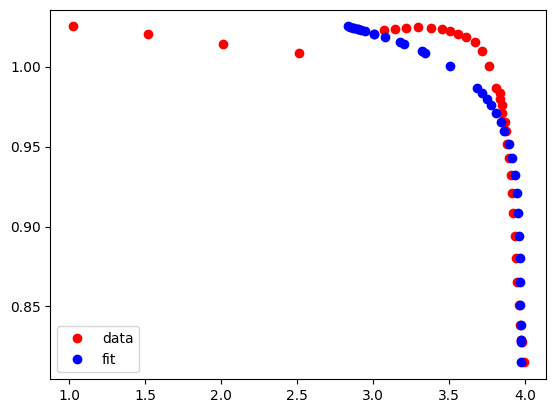

In [47]:
rtfit_ans = GF(rtnew_y,fit_params_arr[:,0], fit_params_arr[:,1],fit_params_arr[:,2])

plt.plot(rtnew_x, rtnew_y, 'ro', label='data')
plt.plot(rtfit_ans, rtnew_y,'o', color ='blue', label ="fit")
plt.legend()

plt.show()

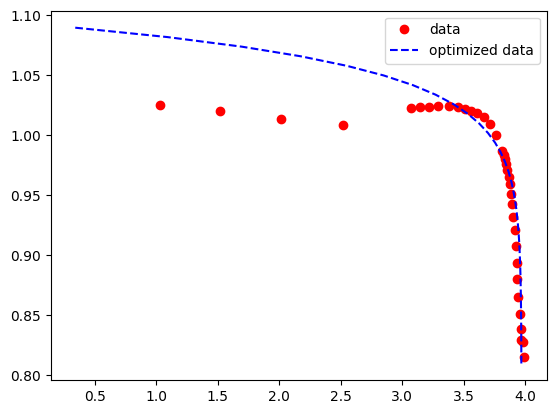

In [48]:
def GF(y,a,b):
    return -b**(a*y-2.72)+3.97

#plot a guess to make sure the guess values work
rtfit_y = np.linspace(0.81, 1.090, 36)
rtans = GF(rtfit_y,2.6,85000)

plt.plot(rtnew_x, rtnew_y, 'ro', label='data')
plt.plot(rtans, rtfit_y, '--', color ='blue', label ="optimized data")
plt.legend()

plt.show()

In [49]:
rtdel_lam_smooth=np.zeros(np.shape(rtdel_lam))
for i in range(len(del_lam)):
    if i==0:
        del_lam_smooth[i]=(del_lam[i]+del_lam[i]+del_lam[i+1])/3
    elif i==len(del_lam)-1:
        del_lam_smooth[i]=(del_lam[i-1]+del_lam[i]+del_lam[i])/3
    else:
        del_lam_smooth[i]=(del_lam[i-1]+del_lam[i]+del_lam[i+1])/3

In [50]:
print(rtdel_lam_smooth)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


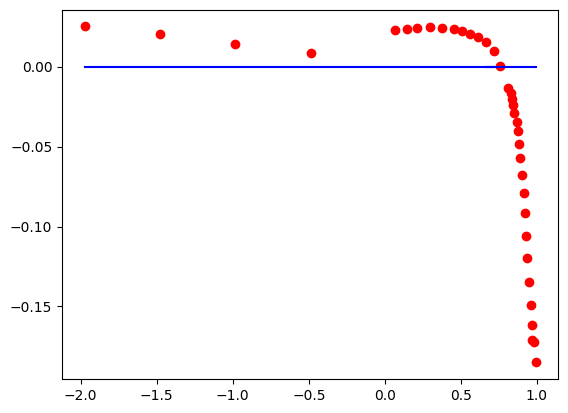

In [51]:
plt.plot(rtx, rtdel_lam, 'ro', label='data')
plt.plot(rtx, rtdel_lam_smooth, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()